<h1>3) Deep Learning für Zeitreihen: Praxis, Vergleich & Anwendung</h1>
<h4>Mittwoch 05.06.23 13:30 – 17:00</h4>
<br>
--- <br>
3.1 Daten vorbereiten <br>
3.2 ARIMA Vorhersage <br>
3.3 Prophet Vorhersage <br>
2.3 LSTM Vorhersage und Tuning <br>
---

In [1]:
import os
import datetime

import IPython
import IPython.display

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

### Data preparation

Wetter

In [2]:
df = pd.read_csv("weather.csv")
date_time = pd.date_range(start='2009-01-01', periods=len(df), freq='h')
df['Time'] = date_time
df.set_index('Time', inplace=True)
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Time,,,,,,,,,,,,,,
2009-01-01 00:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 01:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 02:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 03:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 04:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


Stromverbrauch

In [57]:
elec = pd.read_csv("electricity.txt.gz", sep=",", header=None)
elec.columns=["Haushalt"+str(i) for i in range(1, 322)]
elec['Zeit'] = pd.date_range('2012-01-01', periods=26304, freq='h')
elec.set_index('Zeit', inplace=True)
elec.tail()

,Haushalt1,Haushalt2,Haushalt3,Haushalt4,Haushalt5,Haushalt6,Haushalt7,Haushalt8,Haushalt9,Haushalt10,...,Haushalt312,Haushalt313,Haushalt314,Haushalt315,Haushalt316,Haushalt317,Haushalt318,Haushalt319,Haushalt320,Haushalt321
Zeit,,,,,,,,,,,,,,,,,,,,,
2014-12-31 19:00:00,11.0,116.0,8.0,844.0,384.0,1590.0,51.0,1412.0,407.0,351.0,...,1897.0,1589.0,166500.0,9917.0,10412.0,324.0,21.0,1870.0,162.0,2773.0
2014-12-31 20:00:00,11.0,103.0,8.0,749.0,371.0,1366.0,47.0,1265.0,369.0,327.0,...,1374.0,1336.0,158800.0,6812.0,8956.0,302.0,20.0,1506.0,438.0,2755.0
2014-12-31 21:00:00,12.0,93.0,8.0,650.0,346.0,1282.0,48.0,1079.0,308.0,283.0,...,938.0,1311.0,154300.0,6602.0,5910.0,302.0,18.0,1864.0,621.0,2650.0
2014-12-31 22:00:00,10.0,92.0,8.0,646.0,349.0,1261.0,48.0,1009.0,288.0,292.0,...,833.0,1227.0,141900.0,6546.0,5502.0,259.0,33.0,2623.0,783.0,2719.0
2014-12-31 23:00:00,11.0,88.0,8.0,648.0,337.0,1234.0,46.0,1005.0,261.0,294.0,...,783.0,1089.0,112300.0,6188.0,4934.0,115.0,31.0,2706.0,647.0,2640.0


In [59]:
em = elec[['Haushalt4']]
em.columns = ['Stromverbrauch']
em.head()

,Stromverbrauch
Zeit,
2012-01-01 00:00:00,415.0
2012-01-01 01:00:00,556.0
2012-01-01 02:00:00,560.0
2012-01-01 03:00:00,443.0
2012-01-01 04:00:00,346.0


### Daten vorverarbeiten

Wetter

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


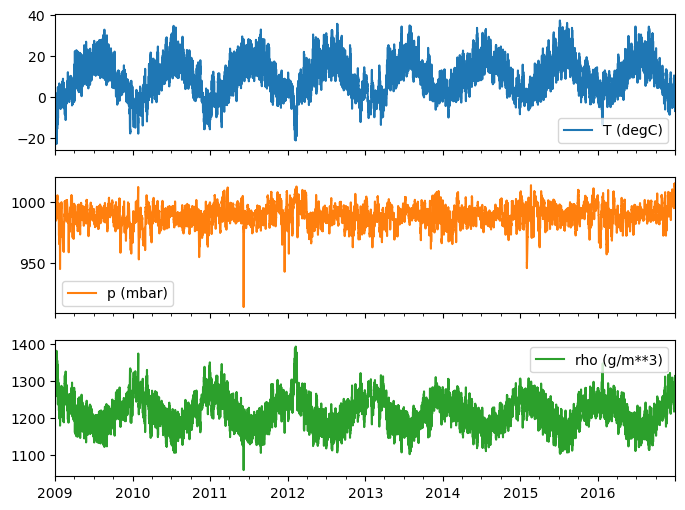

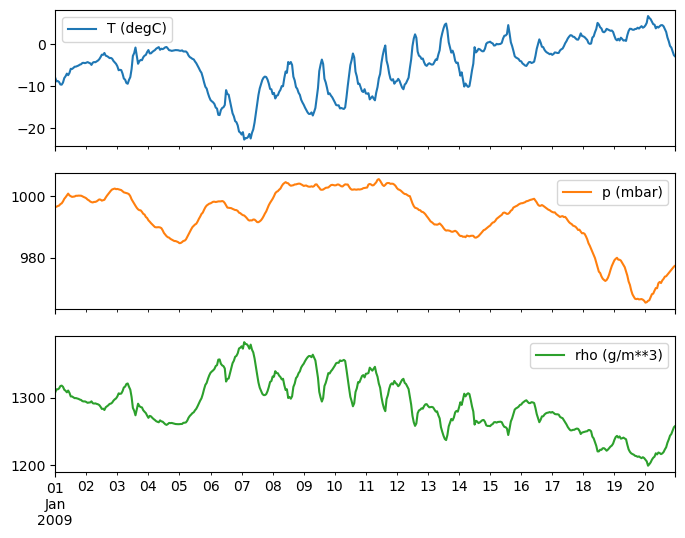

In [3]:
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [5]:
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

df['wv (m/s)'].min()

0.0

### Feature engineering

Beispiel: Wind <br>
* Die letzte Spalte der Daten, "wd (deg)", gibt die Windrichtung in Gradeinheiten an. 
* Winkel sind keine guten Modelleingaben: 360° und 0° sollten nahe beieinander liegen und sich nahtlos ineinander übergehen. 
* Die Richtung sollte keine Rolle spielen, wenn der Wind nicht weht.
* Für das Modell ist dies jedoch einfacher zu interpretieren, wenn Sie die Spalten für Windrichtung und -geschwindigkeit in einen Windvektor umwandeln

In [6]:
wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

# Umrechnung in Bogenmaß.
wd_rad = df.pop('wd (deg)')*np.pi / 180

# Berechnen Sie die x- und y-Komponenten des Windes.
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

# Berechnen Sie die maximalen x- und y-Komponenten des Windes.
df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

Beispiel: Zeit <br>
* Die Spalte "Datum - Zeit" in den vorliegenden Wetterdaten ist zwar nützlich, aber nicht in der aktuellen Stringform. 
* Es wird empfohlen, diese in Sekunden umzuwandeln. 
* Auch die Zeit in Sekunden ist jedoch kein nützlicher Eingabewert für das Modell, da die Wetterdaten eine klare tägliche und jährliche Periodizität aufweisen. 
* Es gibt verschiedene Möglichkeiten, mit dieser Periodizität umzugehen.* 
Eine Möglichkeit besteht darin, Sinus- und Kosinustransformationen zu verwenden, um die Signale "Tageszeit" und "Jahreszeit" zu extrahieren
n.

In [7]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

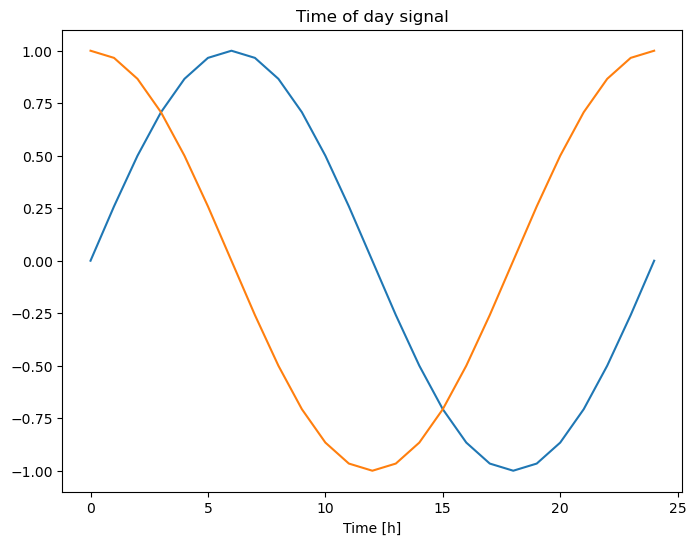

In [8]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

* Dies ermöglicht es dem Modell, auf die wichtigsten Frequenzmerkmale zuzugreifen. 
* Falls die relevanten Frequenzen nicht bekannt sind, können diese mithilfe einer schnellen Fourier-Transformation ermittelt werden. 
* Zur Überprüfung der Annahmen wird das `tf.signal.rfft` der Temperatur über die Zeit betrachtet. 
* Dabei sind deutliche Peaks bei Frequenzen nahe "1/Jahr" und "1/Tag" zu erkennen.

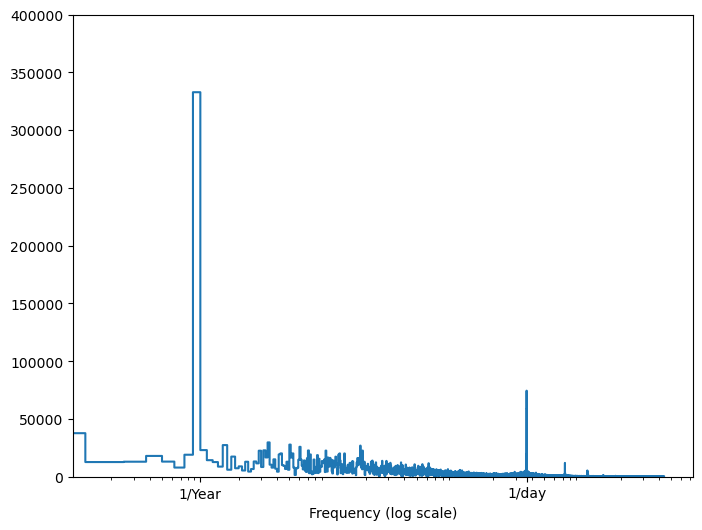

In [9]:
fft = tf.signal.rfft(df['T (degC)'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['T (degC)'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

### Trainings-, Validierungs- und Testdaten (und normalisieren)

In [10]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [11]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

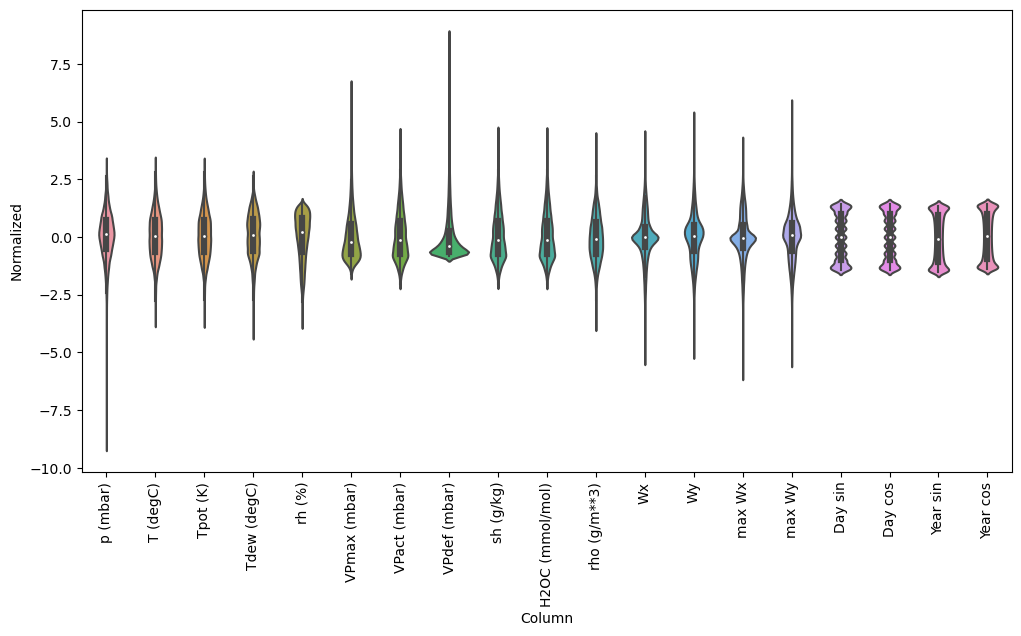

In [12]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

### Datenfenster

Wir betrachten hier Vorhersagen auf der Grundlage eines Fensters von aufeinanderfolgenden Stichproben aus den Daten.

Die wichtigsten Merkmale der Eingabefenster sind:

- Die Breite (Anzahl der Zeitschritte) der Eingabe- (input) und Ausgabe- (label) Fenster. 
- Der zeitliche Abstand zwischen ihnen. (offset)
- Welche Merkmale als Eingaben, Beschriftungen oder beides verwendet werden. 

In diesem Tutorium werden verschiedene Modelle (einschließlich linearer, DNN- und RNN-Modelle) erstellt und für beides verwendet:

- *Ein-Schritt* und *Mehr-Schritt* Vorhersagen.

Dieser Abschnitt konzentriert sich auf die Implementierung der Datenfenster, damit sie für alle diese Modelle wiederverwendet werden können.

Je nach Aufgabe und Art des Modells möchten Sie möglicherweise eine Vielzahl von Datenfenstern erstellen. Hier sind Beispiele:

1. Ein Modell, das eine Vorhersage für eine Stunde in die Zukunft macht, wenn es sechs Stunden in der Vergangenheit liegt, würde ein Fenster wie dieses benötigen:

![Bild](b2.jpg)

2. Um eine einzelne Vorhersage für 24 Stunden in die Zukunft zu treffen, könnten Sie ein Fenster wie das folgende definieren, wenn Sie 24 Stunden in der Vergangenheit liegen:

![Bild](b1.jpg)



In Tensorflow gibt es die Klasse `WindowGenerator`. Diese Klasse kann Fenster von Features in `(Features, Labels)` Paare aufteilen. Sowie effiziente Erzeugung von Stapeln dieser Fenster aus den Trainings-, Bewertungs- und Testdaten unter Verwendung von `tf.data.Dataset`.

In [13]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [14]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['T (degC)'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['T (degC)']

In [15]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['T (degC)'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['T (degC)']

Die Methode `split_window` wandelt eine Liste von aufeinanderfolgenden Eingaben in ein Fenster mit Eingaben und ein Fenster mit Bezeichnungen um.

Das Beispiel "w2", das Sie zuvor definiert haben, wird wie folgt aufgeteilt:

![Bild](b3.jpg)

In [16]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Beim Slicing werden die statischen Forminformationen nicht beibehalten, 
    # daher müssen die Formen manuell festgelegt werden. Auf diese Weise sind die "tf.data.Datasets" leichter zu untersuchen.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [17]:
# Drei Scheiben stapeln, die Länge des gesamten Fensters.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 19)
Inputs shape: (3, 6, 19)
Labels shape: (3, 1, 1)


In [18]:
w2.example = example_inputs, example_labels

In [19]:
def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

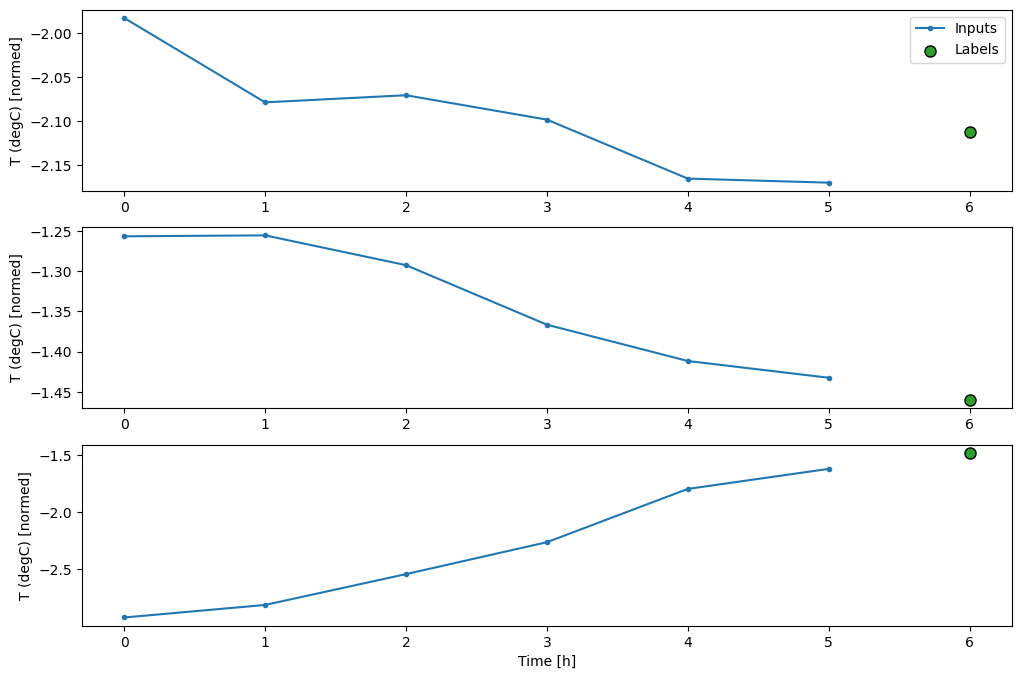

In [20]:
w2.plot()

Schließlich nimmt diese make_dataset-Methode einen Zeitreihen-DataFrame und konvertiert ihn in einen tf.data.Dataset von (input_window, label_window) Paaren unter Verwendung der tf.keras.utils.timeseries_dataset_from_array-Funktion:

In [21]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [22]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [23]:
w2.train.element_spec

(TensorSpec(shape=(None, 6, 19), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [24]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 19)
Labels shape (batch, time, features): (32, 1, 1)


### Naive Vorhersage als Baseline

![Bild](b4.jpg)

In [25]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['T (degC)'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['T (degC)']

In [26]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 19)
Labels shape (batch, time, features): (32, 1, 1)


In [27]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [28]:
baseline = Baseline(label_index=column_indices['T (degC)'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val, return_dict=True)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0, return_dict=True)

439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 0.0125 - mean_absolute_error: 0.0781


![Bild](b5.jpg)

In [29]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['T (degC)'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['T (degC)']

In [30]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 19)
Output shape: (32, 24, 1)


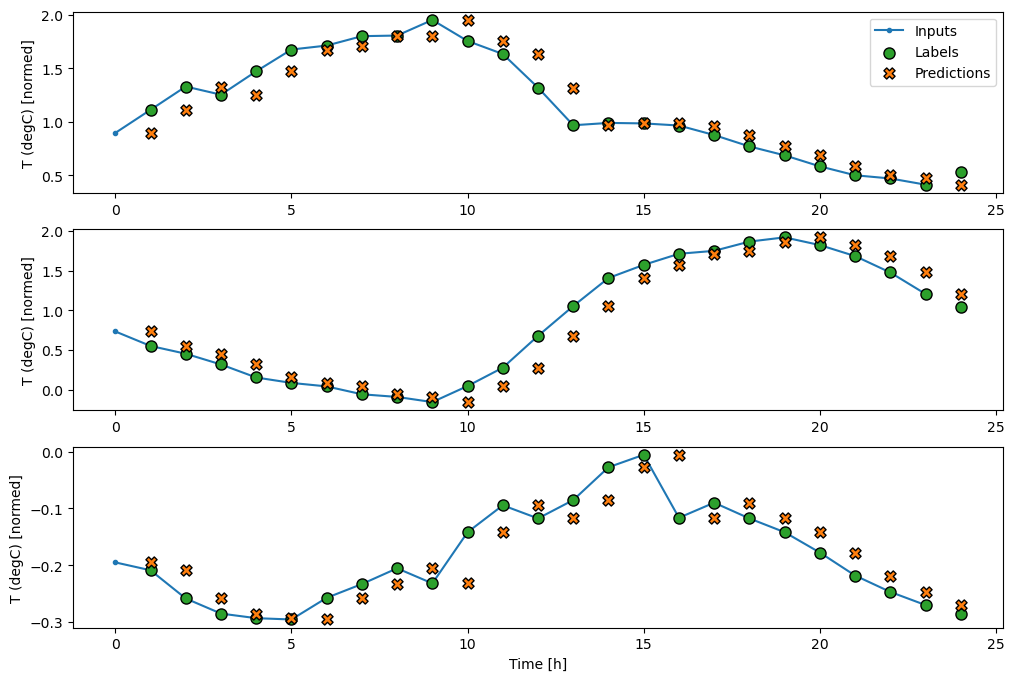

In [31]:
wide_window.plot(baseline)

### Klassisches MLP

In [32]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [33]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val, return_dict=True)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0, return_dict=True)

Epoch 1/20
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0413 - mean_absolute_error: 0.1156 - val_loss: 0.0273 - val_mean_absolute_error: 0.1277
Epoch 2/20
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0095 - mean_absolute_error: 0.0705 - val_loss: 0.0269 - val_mean_absolute_error: 0.1239
Epoch 3/20
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0088 - mean_absolute_error: 0.0675 - val_loss: 0.0262 - val_mean_absolute_error: 0.1231
Epoch 4/20
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0084 - mean_absolute_error: 0.0655 - val_loss: 0.0249 - val_mean_absolute_error: 0.1211
Epoch 5/20
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0082 - mean_absolute_error: 0.0641 - val_loss: 0.0236 - val_mean_absolute_error: 0.1160
Epoch 6/20
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0079 - mean_absolute_error: 0.0628 - val_loss: 0.0242 - val_mean_absolute_error: 0.1182
Epoch 7/20
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0078 - mean_absolute_err

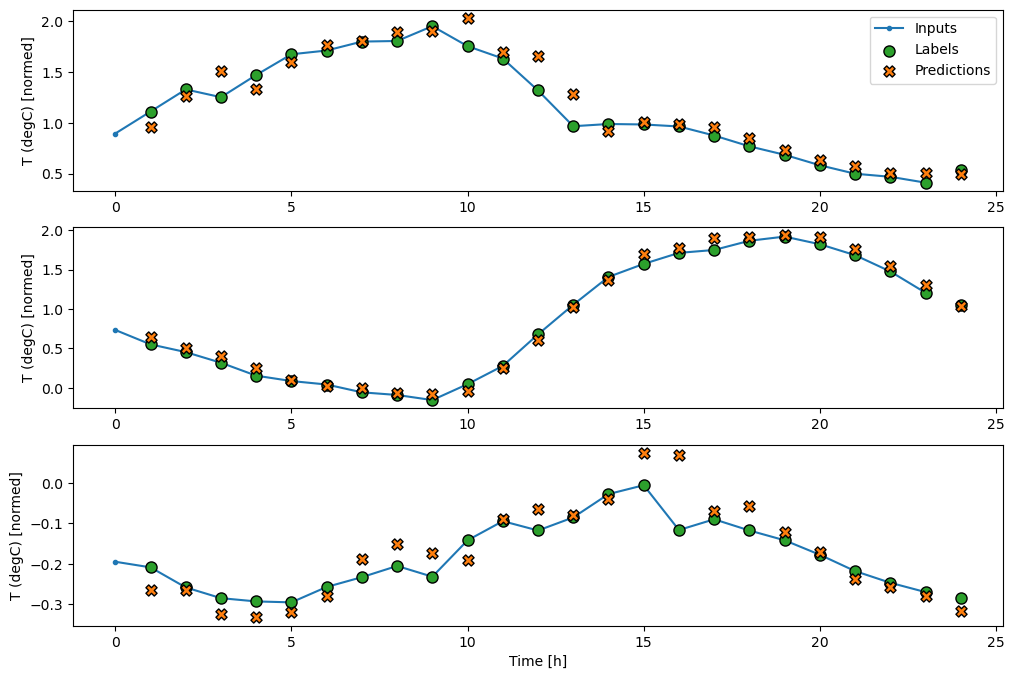

In [34]:
wide_window.plot(dense)

### LSTM

Ein wichtiges Konstruktorargument für alle Keras RNN-Schichten, wie z.B. `tf.keras.layers.LSTM`, ist das Argument `return_sequences`. Mit dieser Einstellung kann die Schicht auf eine von zwei Arten konfiguriert werden:

1. Bei `False`, der Voreinstellung, gibt die Schicht nur die Ausgabe des letzten Zeitschritts zurück, um dem Modell Zeit zu geben, seinen internen Zustand aufzuwärmen, bevor es eine einzige Vorhersage macht:

![Bild](b6.jpg)

2. Wenn `True`, gibt die Schicht eine Ausgabe für jede Eingabe zurück. Dies ist nützlich für:
  * Stapeln von RNN-Schichten.
  * Training eines Modells in mehreren Zeitschritten gleichzeitig.

![Bild](b7.jpg)

In [35]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [36]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 19)
Output shape: (32, 24, 1)


In [37]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val, return_dict=True)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0, return_dict=True)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0141 - mean_absolute_error: 0.0875


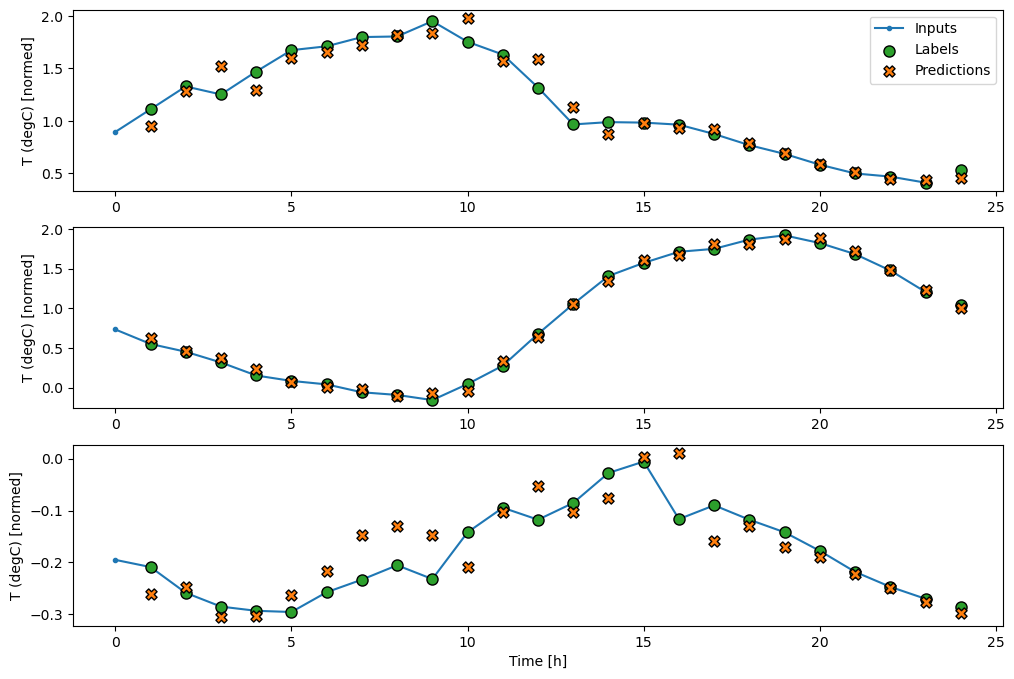

In [38]:
wide_window.plot(lstm_model)

In [39]:
cm = lstm_model.metrics[1]
cm.metrics

[<MeanAbsoluteError name=mean_absolute_error>]

In [40]:
val_performance

{'Baseline': {'loss': 0.012845640070736408,
  'mean_absolute_error': 0.07846628874540329},
 'Dense': {'loss': 0.024316072463989258,
  'mean_absolute_error': 0.1184004470705986},
 'LSTM': {'loss': 0.014112134464085102,
  'mean_absolute_error': 0.08733633905649185}}

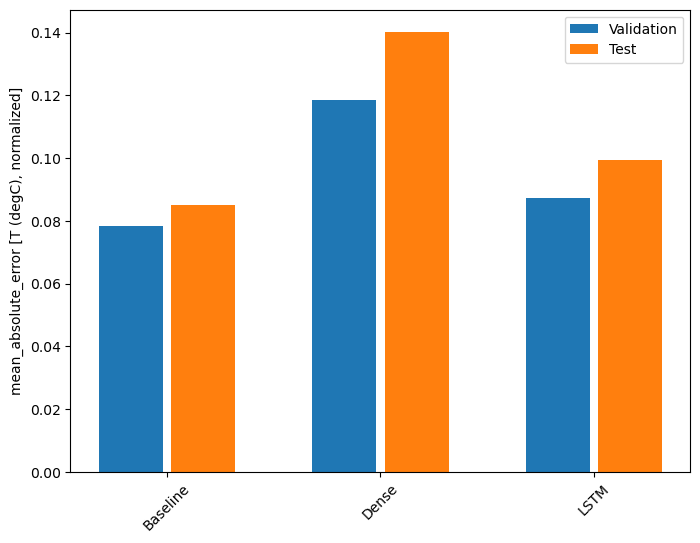

In [41]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
val_mae = [v[metric_name] for v in val_performance.values()]
test_mae = [v[metric_name] for v in performance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [42]:
for name, value in performance.items():
  print(f'{name:12s}: {value[metric_name]:0.4f}')

Baseline    : 0.0852
Dense       : 0.1402
LSTM        : 0.0995


### Mehrschrittmodell

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

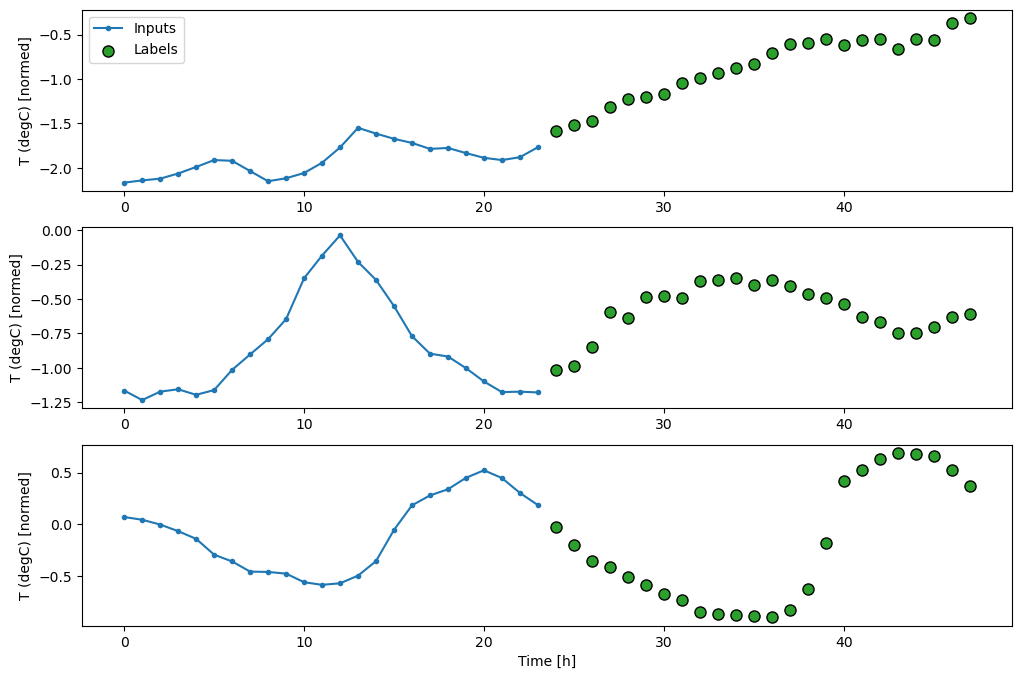

In [43]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

### Naive Baseline

![Bild](b8.jpg)

437/437 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - loss: 0.6243 - mean_absolute_error: 0.4988


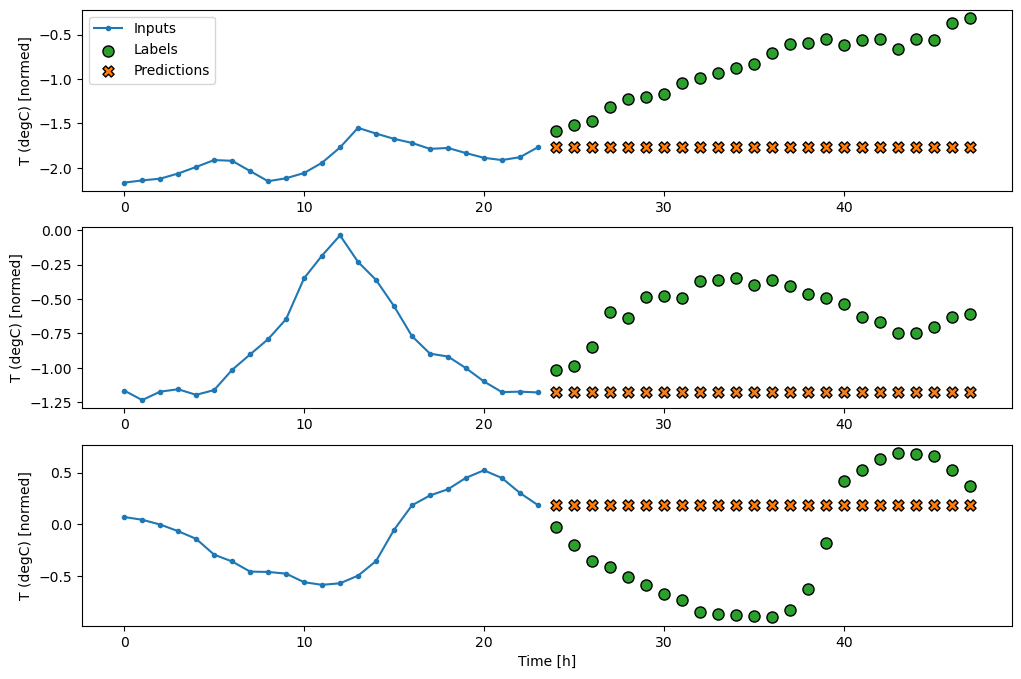

In [44]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val, return_dict=True)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(last_baseline)

### MLP Multistep

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3907 - mean_absolute_error: 0.3901


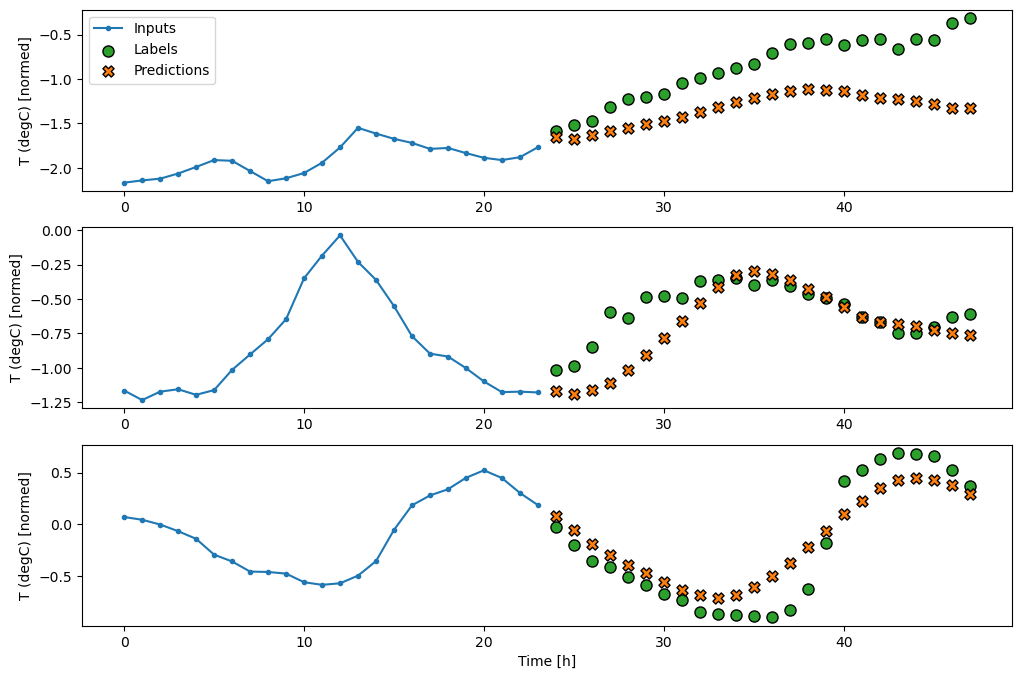

In [45]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val, return_dict=True)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(multi_dense_model)

### LSTM Multistep

![Bild](b9.jpg)

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3201 - mean_absolute_error: 0.3609


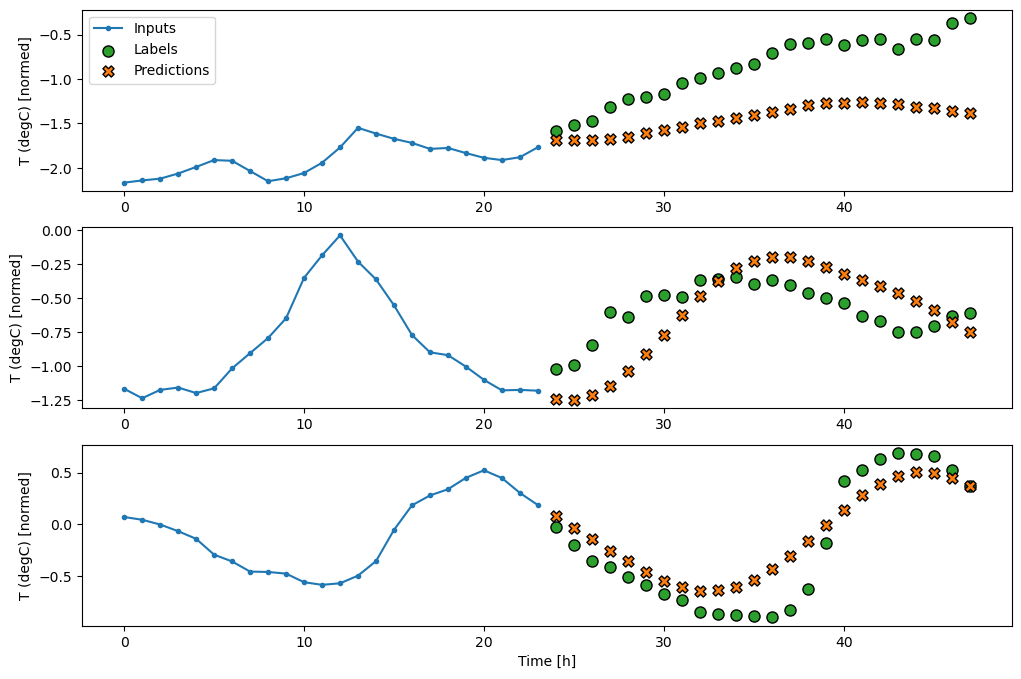

In [47]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Das Hinzufügen von mehr "lstm_units" führt zu einer schnelleren Überdeckung.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val, return_dict=True)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(multi_lstm_model)

### Fortgeschrittener Autoregressives Modell

In [48]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [49]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [50]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [51]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 19])

In [52]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [53]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 24, 19)


437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3658 - mean_absolute_error: 0.3921


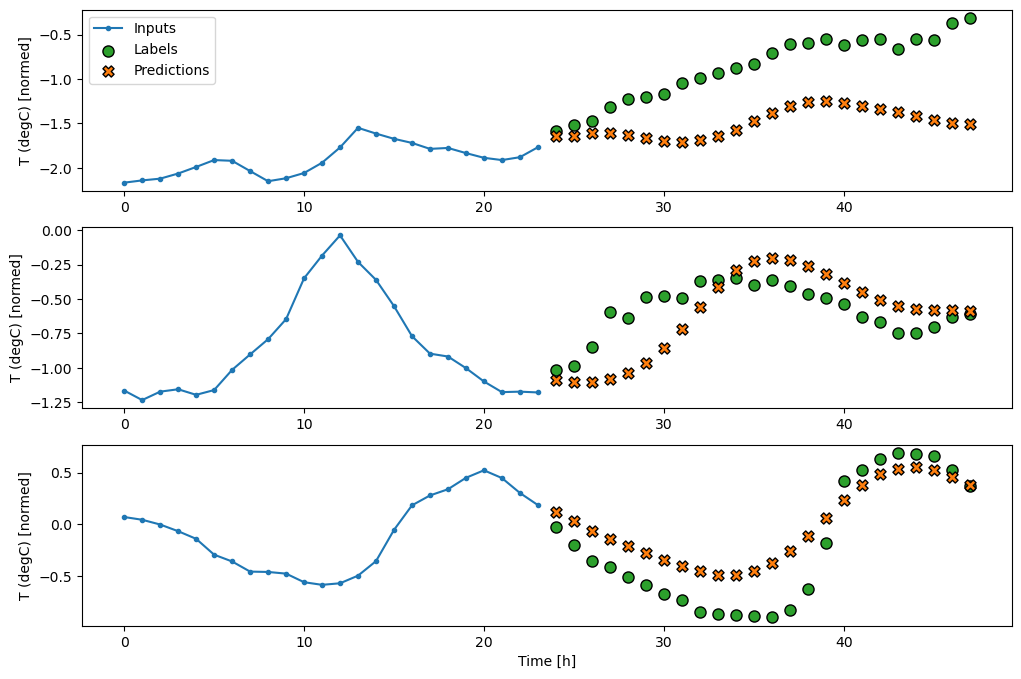

In [54]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val, return_dict=True)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(feedback_model)

### Performance

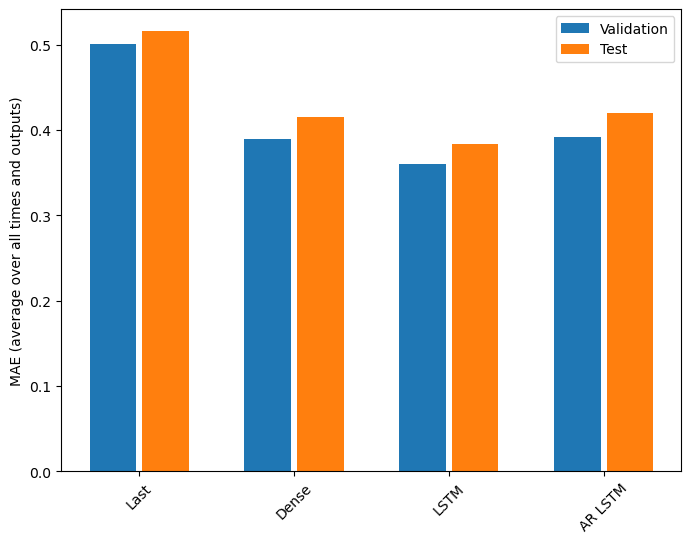

In [55]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'mean_absolute_error'
val_mae = [v[metric_name] for v in multi_val_performance.values()]
test_mae = [v[metric_name] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [56]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[metric_name]:0.4f}')

Last    : 0.5156
Dense   : 0.4158
LSTM    : 0.3839
AR LSTM : 0.4198
